In [1]:
import pandas as pd
import json

In [5]:
with open('formatted_dataset.json','r') as json_file:
    data = json.load(json_file)
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)


In [9]:
with open('formatted_test_dataset.json','r') as json_file:
    data = json.load(json_file)
df1 = pd.DataFrame(data)
df1.to_csv('test.csv', index=False)


In [8]:
df = pd.read_csv('data.csv')
df.head()
df1.head()

,instruction,response
0,What is the difference between a microcontroll...,A microcontroller (uC) is designed as a single...
1,What is the instruction width of the PIC24 mic...,The instruction width of the PIC24 microcontro...
2,How much program memory does the PIC24HJ32GP20...,The PIC24HJ32GP202 microcontroller supports 32...
3,What is the maximum clock speed of the PIC24H ...,The maximum clock speed of the PIC24H family i...
4,What is the difference between program memory ...,Program memory in the PIC24 microcontroller is...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  634 non-null    object
 1   response     634 non-null    object
dtypes: object(2)
memory usage: 10.0+ KB


In [5]:
print(len(df))

427


In [6]:
print("Data types:", df.dtypes)

Data types: instruction    object
response       object
dtype: object


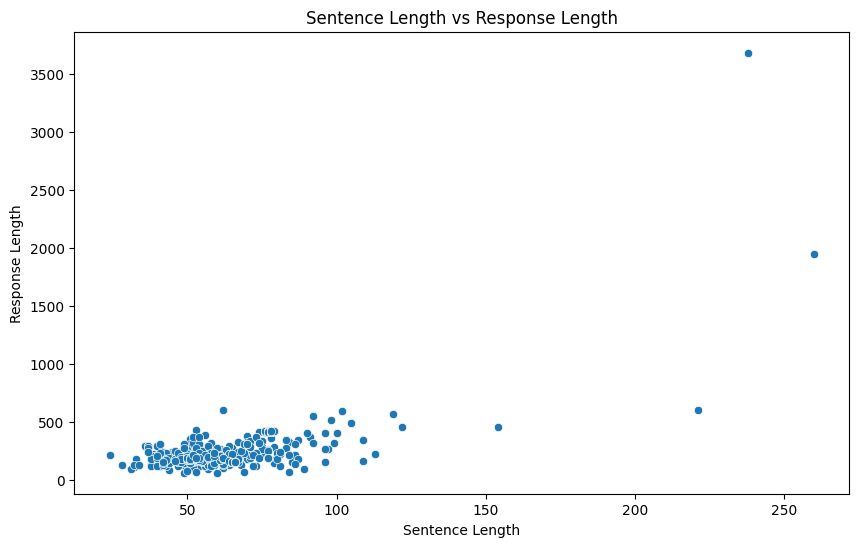

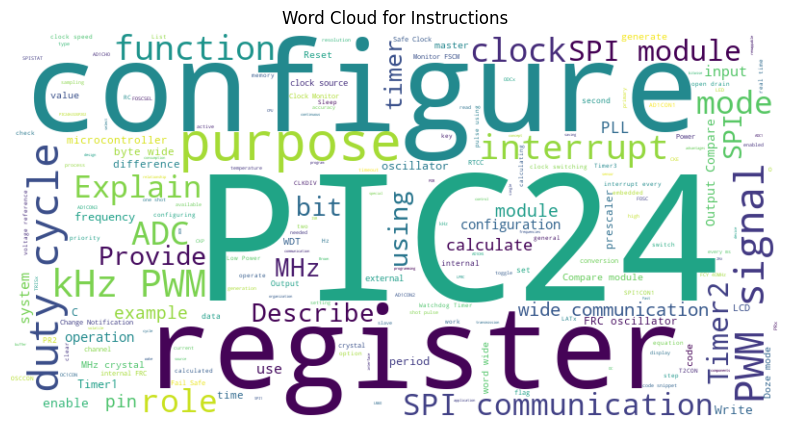

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Calculate lengths of Instruction and response
df['instruction_length'] = df['instruction'].apply(len)  # Store lengths in a new column
df['response_length'] = df['response'].apply(len)  # Store lengths in a new column

# Scatter plot for sentence length vs response length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='instruction_length', y='response_length', data=df)
plt.title('Sentence Length vs Response Length')
plt.xlabel('Sentence Length')
plt.ylabel('Response Length')
plt.show()
instruction_text = ' '.join(df['instruction'])  # Use the original 'instruction' column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(instruction_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Instructions')
plt.show()

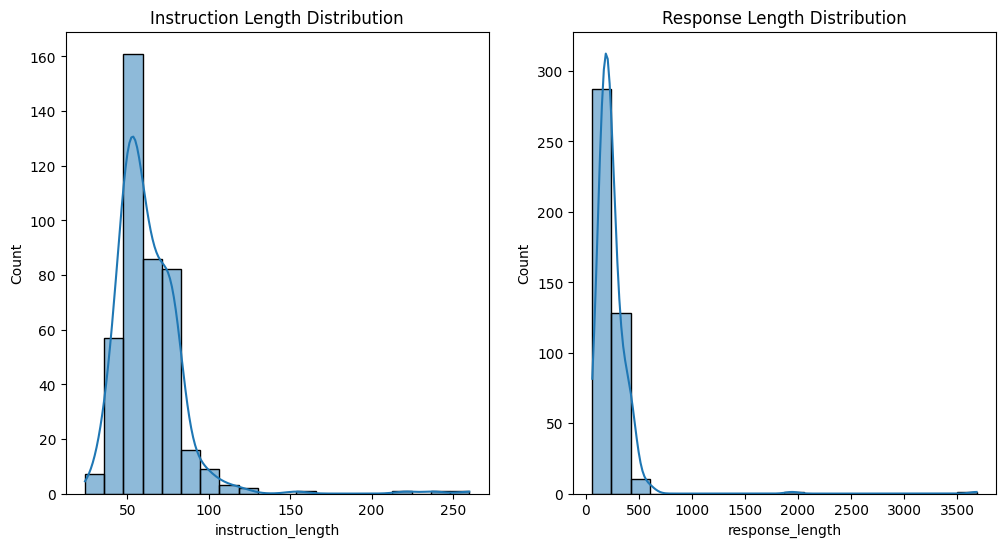

In [8]:
df['instruction_length'] = df['instruction'].apply(len)
df['response_length'] = df['response'].apply(len)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['instruction_length'], bins=20, kde=True)
plt.title('Instruction Length Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['response_length'], bins=20, kde=True)
plt.title('Response Length Distribution')

plt.show()

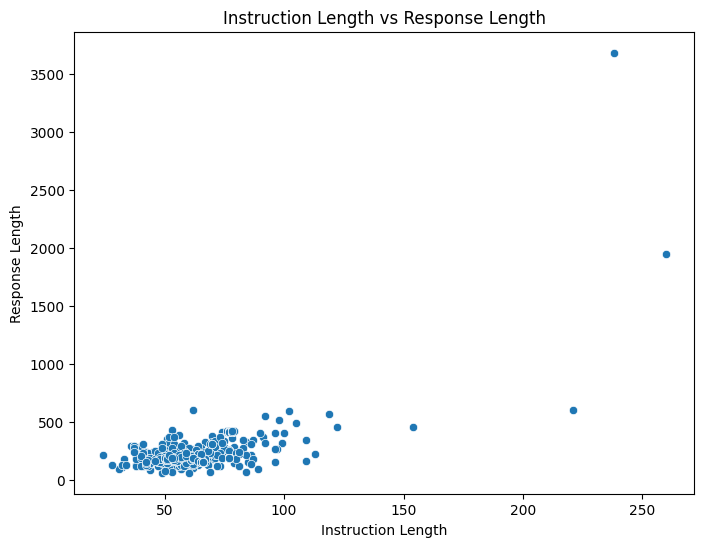

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['instruction_length'], y=df['response_length'])
plt.title('Instruction Length vs Response Length')
plt.xlabel('Instruction Length')
plt.ylabel('Response Length')
plt.show()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n-grams
def get_top_ngrams(text_series, n=2, top_k=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text_series)
    bag_of_words = vec.transform(text_series)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

top_bigrams_instruction = get_top_ngrams(df['instruction'], n=2)
print("Top Bigrams in Instructions:", top_bigrams_instruction)
top_bigrams_response = get_top_ngrams(df['response'], n=2)
print("Top Bigrams in Responses:", top_bigrams_response)

Top Bigrams in Instructions: [('in pic24', np.int64(182)), ('how do', np.int64(160)), ('do you', np.int64(159)), ('what is', np.int64(136)), ('is the', np.int64(136)), ('of the', np.int64(129)), ('you configure', np.int64(115)), ('configure the', np.int64(93)), ('register in', np.int64(88)), ('the pic24', np.int64(81))]
Top Bigrams in Responses: [('set the', np.int64(231)), ('register to', np.int64(149)), ('to configure', np.int64(145)), ('in pic24', np.int64(114)), ('in the', np.int64(104)), ('pwm mode', np.int64(86)), ('duty cycle', np.int64(84)), ('configure the', np.int64(84)), ('is used', np.int64(83)), ('the pr2', np.int64(83))]
